In [1]:
import matplotlib.pyplot as plt

In [ ]:
def read_first_values(file_path):
    """
    Reads a text file containing tuples and extracts the first value of each tuple.

    :param file_path: Path to the text file.
    :return: List of first values from the tuples.
    """
    first_values = []
    with open(file_path, "r") as file:
        for line in file:
            # Parse the line as a tuple and extract the first value
            try:
                tuple_value = eval(line.strip())
                first_values.append(tuple_value[0])
            except (SyntaxError, IndexError):
                print(f"Skipping invalid line: {line.strip()}")
    return first_values


In [3]:
def moving_average(data, window_size):
    """
    Applies a moving average to smooth the data.

    :param data: List of values to smooth.
    :param window_size: Size of the moving average window.
    :return: Smoothed data.
    """
    return [sum(data[max(0, i - window_size + 1) : i + 1]) / min(i + 1, window_size) for i in range(len(data))]

In [4]:
def plot_curves(file_paths, labels=None, couleurs=None, titre="Graphique", xlabel="Indices", ylabel="Valeurs"):
    """
    Plots multiple curves on the same graph from data in TXT files.

    :param file_paths: List of paths to text files containing data.
    :param labels: List of labels for each curve (optional).
    :param couleurs: List of colors for each curve (optional).
    :param titre: Title of the graph (optional).
    :param xlabel: Label for the x-axis (optional).
    :param ylabel: Label for the y-axis (optional).
    """
    plt.figure(figsize=(10, 6))
    for i, file_path in enumerate(file_paths):
        data = read_first_values(file_path)
        x = [i * 20 for i in range(len(data))]
        label = labels[i] if labels and i < len(labels) else f"Courbe {i+1}"
        couleur = couleurs[i] if couleurs and i < len(couleurs) else None
        smoothed_data = moving_average(data, window_size=10)
        plt.plot(x, smoothed_data, label=label, color=couleur)

        # plt.text(x[0]-1, data[0], label[0], fontsize=10, ha='right', va='center')
        # plt.text(x[-1], smoothed_data[-1], label[0], fontsize=10, ha='left', va='center')

    plt.title(titre)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()


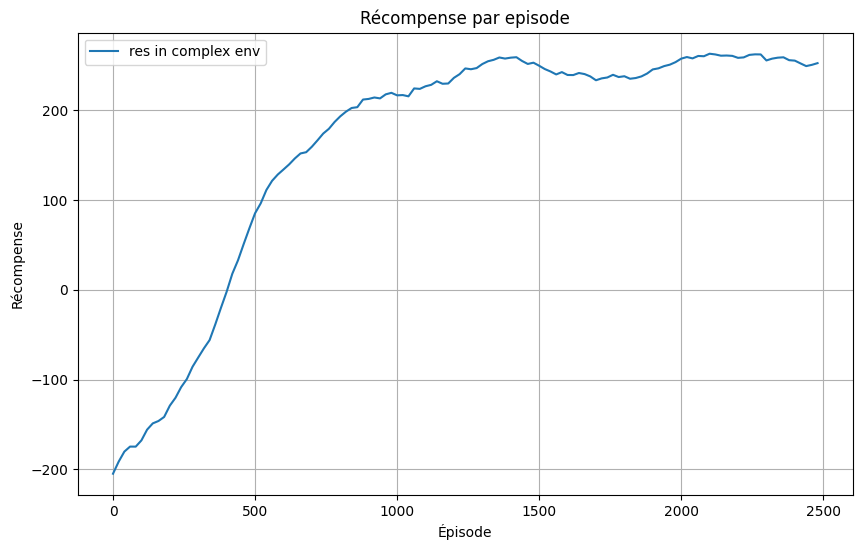

In [ ]:
# Can add other files to plot multiple curves at once, and compare parameters
file_paths = [
    "trained_model_history_avg_reward.txt",
]
labels = ["res in complex env"]

plot_curves(
    file_paths,
    labels=labels,
    titre="Récompense par episode",
    xlabel="Épisode",
    ylabel="Récompense",
)